In [1]:
import pandas as pd 
import numpy as np
dff=pd.read_csv('modell/electricity_cost_dataset.csv')

In [2]:
df=dff.copy()

In [3]:
df.head(10)

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0
5,3944,Commercial,6960.0,22,43,194,59,0,3800.0
6,3671,Residential,2803.0,24,66,149,18,139,3661.0
7,3419,Mixed-use,5601.0,17,61,140,21,38,2538.0
8,630,Residential,1000.0,20,82,92,56,41,1390.0
9,2185,Residential,2170.0,32,57,133,52,117,2599.0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

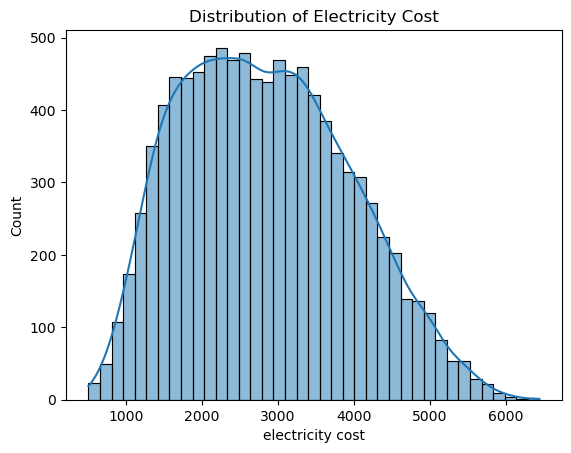

In [5]:
sns.histplot(df['electricity cost'], kde=True)
plt.title("Distribution of Electricity Cost")
plt.show()

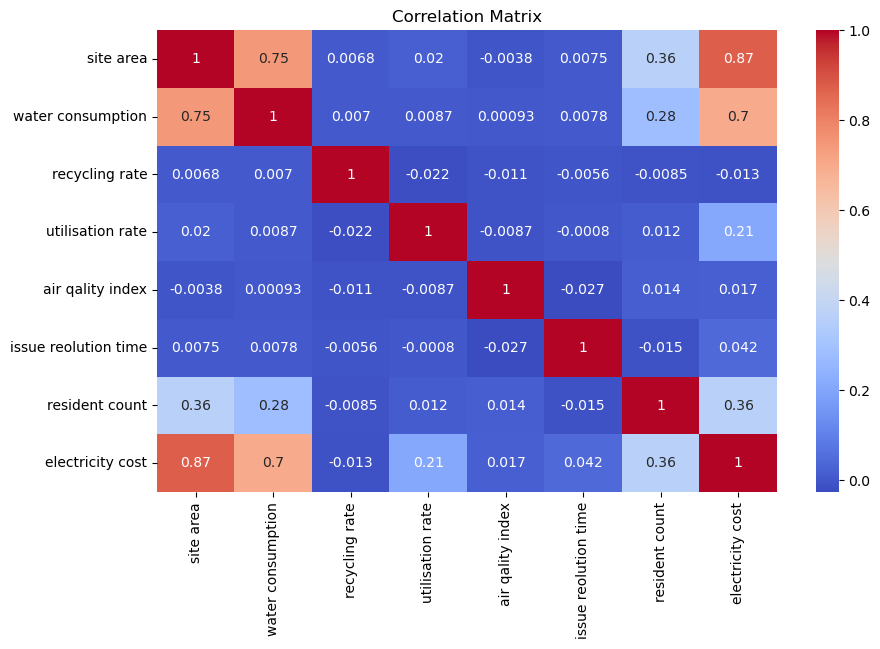

In [6]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
df.columns

Index(['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count', 'electricity cost'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


There is no element have value null . so we don't need to replace any element with the mean ,mode or meadian.

In [9]:
df['structure type'].unique()

array(['Mixed-use', 'Residential', 'Commercial', 'Industrial'],
      dtype=object)

In [10]:
def struct(df):
    if df=='Mixed-use':
        return 0
    elif df=='Residential':
        return 1
    elif df=='Commercial':
        return 2
    elif df=='Industrial':
        return 3

In [11]:
df['structure type']=df['structure type'].apply(struct)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['site area', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count']] = scaler.fit_transform(df[['site area', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count']])

In [13]:
X=df[['site area', 'structure type', 'water consumption', 'recycling rate',
       'utilisation rate','air qality index', 'issue reolution time',
       'resident count' ]]
y=df['electricity cost']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8)
gradient.fit(X_train, y_train)
y_pred=gradient.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mean_squared_error_value = mean_squared_error(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred)
mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
print(mean_squared_error_value )
print(mean_absolute_error_value )
print(r2_score_value )


46891.934689164
173.13162394394448
0.9624110661207076


In [17]:
from sklearn.pipeline import Pipeline

In [18]:

from sklearn.compose import ColumnTransformer
numeric_features = ['site area','structure type' ,'water consumption', 'recycling rate',
                    'utilisation rate', 'air qality index', 'issue reolution time','resident count']

There is no need of preprocessor because due to preprocessor performance of model is not good r2 score fall down from 96 to 90 

In [19]:
pipeline = Pipeline([
    ("classifier", GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=8,
        random_state=1
    ))
])

In [20]:
# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 GradientBoostingRegressor(max_depth=8, random_state=1))])

In [21]:
y_pred=pipeline.predict(X_test) 
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9626161616735701
46387.58987410797


In [22]:
from joblib import dump
dump(pipeline,'model.joblib')

['model.joblib']

In [23]:
mean_absolute_error(y_test, y_pred)

171.9409162530176